# Configuration Variables

In [42]:
ENABLE_COLAB=True
USE_GPU=True
GENERATE_PROFILE = False
NUM_CLUSTERS = 4
MOVIES_FOR_ANALYSIS = 1.0
DATA_FOR_ANALYSIS = 0.2
DATA_FILE_ROOT_PATH='/content/gdrive/MyDrive/ML1000/Project_Movies2/Original_Data/'
PANDA_PROFILE_OUTPUT_ROOT='/content/gdrive/MyDrive/ML1000/Project_Movies2/Original_Data/'


# Environment

In [2]:
if ENABLE_COLAB:
  !pip install pycaret -q
  !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q
  !pip install matplotlib -q
else:
  display('Google Colab not enabled')

     |████████████████████████████████| 266 kB 5.4 MB/s 
     |████████████████████████████████| 1.7 MB 35.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 18.8 MB/s 
     |████████████████████████████████| 261 kB 52.8 MB/s 
     |████████████████████████████████| 14.6 MB 19.6 MB/s 
     |████████████████████████████████| 167 kB 37.0 MB/s 
     |████████████████████████████████| 111 kB 61.3 MB/s 
     |████████████████████████████████| 271 kB 43.3 MB/s 
     |████████████████████████████████| 1.3 MB 38.5 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 80 kB 9.3 MB/s 
     |████████████████████████████████| 6.8 MB 34.6 MB/s 
     |████████████████████████████████| 3.1 MB 31.8 MB/s 
     |████████████████████████████████| 675 kB 35.9 MB/s 
     |█████████████████

In [3]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

%matplotlib inline

import json

In [4]:
if ENABLE_COLAB:
  from pycaret.utils import enable_colab
  enable_colab()
else:
  display('Google Colab not enabled')

Colab mode enabled.


In [5]:
if ENABLE_COLAB: 
  from google.colab import drive
  drive.mount('/content/gdrive', force_remount=True)
else:
  display('Google Colab not enabled')


Mounted at /content/gdrive


# Data Loading and Display

In [6]:
path_names       = DATA_FILE_ROOT_PATH + 'IMDb names.csv'  #change dir to your project folder
path_movies      = DATA_FILE_ROOT_PATH + 'IMDb movies.csv'  #change dir to your project folder
path_ratings     = DATA_FILE_ROOT_PATH + 'IMDb ratings.csv'  #change dir to your project folder
path_credits     = DATA_FILE_ROOT_PATH + 'IMDb title_principals.csv'  #change dir to your project folder

#added "low memory = False" to avoid a dtype error on loading csv. Seems like it scans a part of the file and may not have interpreted the column type correctly
data_names = pd.read_csv(path_names,low_memory=False)
data_movies = pd.read_csv(path_movies,low_memory=False)
data_ratings = pd.read_csv(path_ratings,low_memory=False)
data_credits = pd.read_csv(path_credits,low_memory=False)


In [7]:
if GENERATE_PROFILE:
  profile_names = ProfileReport(data_names, title="Movies Dataset - Names", html={'style': {'full_width': True}})
  profile_names.to_file(output_file= PANDA_PROFILE_OUTPUT_ROOT + "/DataProfile_Names.html")

  profile_movies = ProfileReport(data_movies, title="Movies Dataset - Movies", html={'style': {'full_width': True}})
  profile_movies.to_file(output_file= PANDA_PROFILE_OUTPUT_ROOT + "DataProfile_Movies.html")

  profile_ratings = ProfileReport(data_ratings, title="Movies Dataset - Ratings", html={'style': {'full_width': True}})
  profile_ratings.to_file(output_file= PANDA_PROFILE_OUTPUT_ROOT + "DataProfile_Ratings.html")

  profile_credits = ProfileReport(data_credits, title="Movies Dataset - Credits", html={'style': {'full_width': True}})
  profile_credits.to_file(output_file= PANDA_PROFILE_OUTPUT_ROOT + "DataProfile_Credits.html")
else:
  display("Generate profile is off")

'Generate profile is off'

In [8]:
display (data_names.shape)
data_names.head(2)

(297705, 17)

,imdb_name_id,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
0,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2,0,1,2
1,nm0000002,Lauren Bacall,Betty Joan Perske,174.0,Lauren Bacall was born Betty Joan Perske on Se...,"September 16, 1924 in The Bronx, New York City...",1924-09-16,"The Bronx, New York City, New York, USA","August 12, 2014 in New York City, New York, US...",2014-08-12,"New York City, New York, USA",stroke,Jason Robards (4 July 1961 - 10 September 196...,2,1,2,3


In [9]:
display (data_movies.shape)
data_movies.head(2)

(85855, 22)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


In [10]:
display(data_ratings.shape)
data_ratings.head(2)

(85855, 49)

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.0,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0


In [11]:
display (data_movies.shape)
data_movies.head(2)

(85855, 22)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


In [12]:
display(data_credits.shape)
data_credits.head(2)

(835513, 6)

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000009,1,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,2,nm0183823,actor,NaN,"[""Mr. Hamilton""]"


# Data Manipulation

In [13]:
display(data_movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

None

In [14]:
#remove unneeded columns from movies
data_movies = data_movies[['imdb_title_id',
                           'title',
                           'genre',
                           'director',
                           'writer',
                           'avg_vote',
                           'votes'
                           #'metascore',
                           #'reviews_from_users',
                           #'reviews_from_critics'
]]
display(data_movies.info())
data_movies.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_title_id  85855 non-null  object 
 1   title          85855 non-null  object 
 2   genre          85855 non-null  object 
 3   director       85768 non-null  object 
 4   writer         84283 non-null  object 
 5   avg_vote       85855 non-null  float64
 6   votes          85855 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 4.6+ MB


None

,imdb_title_id,title,genre,director,writer,avg_vote,votes
0,tt0000009,Miss Jerry,Romance,Alexander Black,Alexander Black,5.9,154
1,tt0000574,The Story of the Kelly Gang,"Biography, Crime, Drama",Charles Tait,Charles Tait,6.1,589


In [15]:
#Trim down the number of movies we are using for analysis before joining

data_movies_trim = data_movies.sample(frac=MOVIES_FOR_ANALYSIS, random_state=54321)
data_movies_unseen = data_movies.drop(data_movies_trim.index)

data_movies_trim.reset_index(inplace=True, drop=True)
data_movies_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling (data_movies_trim): ' + str(data_movies_trim.shape))
print('Unseen Data For Predictions (data_movies_unseen' + str(data_movies_unseen.shape))

Data for Modeling (data_movies_trim): (85855, 7)
Unseen Data For Predictions (data_movies_unseen(0, 7)


In [16]:
display(data_credits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835513 entries, 0 to 835512
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   imdb_title_id  835513 non-null  object
 1   ordering       835513 non-null  int64 
 2   imdb_name_id   835513 non-null  object
 3   category       835513 non-null  object
 4   job            212731 non-null  object
 5   characters     340836 non-null  object
dtypes: int64(1), object(5)
memory usage: 38.2+ MB


None

In [17]:
#Set result dataframe to whatever you want to analyze
result = data_movies_trim

# Data Setup

In [18]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_title_id  85855 non-null  object 
 1   title          85855 non-null  object 
 2   genre          85855 non-null  object 
 3   director       85768 non-null  object 
 4   writer         84283 non-null  object 
 5   avg_vote       85855 non-null  float64
 6   votes          85855 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 4.6+ MB


In [43]:
data_analysis = result.sample(frac=DATA_FOR_ANALYSIS, random_state=54321)
data_unseen = result.drop(data_analysis.index)

data_analysis.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data_analysis.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (17171, 7)
Unseen Data For Predictions (68684, 7)


In [50]:
from pycaret.clustering import *
setup_movies = setup(data_analysis, 
                     #normalize=True,
                     ignore_features = (['imdb_title_id','votes']),
                     high_cardinality_features = (['director', 'writer']),
                     #pca=True,
                     silent=True, 
                     use_gpu=USE_GPU,
                     session_id=123)

,Description,Value
0,session_id,123
1,Original Data,"(17171, 7)"
2,Missing Values,True
3,Numeric Features,1
4,Categorical Features,4
5,Ordinal Features,False
6,High Cardinality Features,True
7,High Cardinality Method,frequency
8,Transformed Data,"(17171, 17735)"
9,CPU Jobs,-1


In [51]:
kmeans = create_model('kmeans', num_clusters=NUM_CLUSTERS)



,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3961,2.417062e+06,0.7801,0,0,0


In [52]:
plot_model(kmeans)

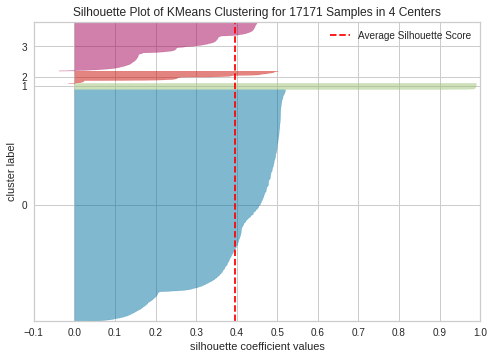

In [53]:
plot_model(kmeans, plot = 'silhouette')

In [54]:
plot_model(kmeans, plot='distribution')

Output hidden; open in https://colab.research.google.com to view.

In [55]:
plot_model(kmeans, plot='distribution', feature='director')

Output hidden; open in https://colab.research.google.com to view.

In [56]:
#plot_model(kmeans, plot='elbow')

In [57]:
#predict_model(kmeans, data=data_unseen)